In [1]:
'''
批训练：把数据分为一小批一小批进行训练
Dataloader就是用来包装使用的数据，
比如说该程序中把数据5个5个的打包，
每一次抛出一组数据进行操作。
'''
import torch
import torch.utils.data as Data
import pandas as pd
from sklearn import preprocessing
import numpy as np
torch.manual_seed(1)
BATCH_SIZE = 5

df = pd.DataFrame(data=preprocessing.StandardScaler().fit_transform(np.random.randint(0, 10, size=(20, 10))))
#    y = pd.Series(np.random.randint(0, 2, 200))
def get_tensor_from_pd(dataframe_series) -> torch.Tensor:
    return torch.tensor(data=dataframe_series.values)
x = get_tensor_from_pd(df).float()#, get_tensor_from_pd(y).float()
# x = np.random.randint(0, 10, size=(200, 5))
y = torch.linspace(11,21,20)
 
torch_dataset = Data.TensorDataset(x,y) #把数据放在数据库中
loader = Data.DataLoader(
    # 从dataset数据库中每次抽出batch_size个数据
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,#将数据打乱
    num_workers=2, #使用两个线程
)
def show_batch():
    for epoch in range(3): #对全部数据进行3次训练
        for step,(batch_x,batch_y) in enumerate(loader): # 每一次挑选出来的size个数据
 
            # training
 
            # 打印出来，观察数据
            print('Epoch:',epoch,'|Step:',step,'|batch x:',
                  batch_x.numpy(),'|batch y:',batch_y.numpy())


In [2]:
# show_batch()

In [3]:
from chusai import *
# from scipy.io import savemat
PathSet = {0:"./TestData", 1:"./CompetitionData1", 2:"./CompetitionData2", 3:"./CompetitionData3", 4:"./CompetitionData4"}
PrefixSet = {0:"Test" , 1:"Round1", 2:"Round2", 3:"Round3", 4:"Round4"}

Ridx = 0 # 设置比赛轮次索引，指明数据存放目录。0:Test; 1: 1st round; 2: 2nd round ...
PathRaw = "./chusai_data/" + PathSet[Ridx]
PathOut = "./outputs/" + PathSet[Ridx]
PathTrain = './train_data/' 
Prefix = PrefixSet[Ridx]

## 1查找文件
names= FindFiles(PathRaw) # 查找文件夹中包含的所有比赛/测试数据文件，非本轮次数据请不要放在目标文件夹中

dirs = os.listdir(PathRaw)
names = []  # 文件编号
files = []
for f in sorted(dirs):
    if f.endswith('.txt'):
        files.append(f)
for f in sorted(files):
    if f.find('CfgData')!=-1 and f.endswith('.txt'):
        names.append(f.split('CfgData')[-1].split('.txt')[0])

## 2创建对象并处理
Rst = []
Gt  = []
# for na in names: #
for na in [names[2]]:#
    # 读取配置及CSI数据
    Cfg = CfgFormat(PathRaw + '/' + Prefix + 'CfgData' + na + '.txt')
    csi = np.genfromtxt(PathRaw + '/' + Prefix + 'InputData' + na + '.txt', dtype = float)
    CSI = csi[:,0::2] + 1j* csi[:,1::2]

Now reading file TestCfgData001.txt ...

Now reading file TestCfgData002.txt ...

Now reading file TestCfgData003.txt ...

Now reading file TestCfgData004.txt ...

Now reading file TestCfgData005.txt ...

Now reading file TestCfgData006.txt ...

Now reading file TestCfgData007.txt ...

Now reading file TestCfgData008.txt ...

Now reading file TestCfgData009.txt ...



In [4]:
Cfg

{'Nsamp': 50,
 'Np': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]),
 'Ntx': 1,
 'Nrx': 8,
 'Nsc': 40,
 'Nt': array([1300, 1300, 1300, 2600, 2600, 1300, 1300, 1300, 1300, 1300, 1300,
        2600, 2600, 1300, 1300, 1300, 1300, 2600, 2600, 2600, 1300, 1300,
        1300, 1300, 1300, 2600, 1300, 1300, 1300, 1300, 2600, 1300, 1300,
        1300, 1300, 1300, 1300, 1300, 1300, 1300, 2600, 1300, 1300, 2600,
        1300, 1300, 2600, 1300, 1300, 1300]),
 'Tdur': array([30.067, 30.077, 30.067, 60.101, 60.094, 30.067, 30.077, 30.066,
        30.066, 30.077, 30.066, 60.094, 60.094, 30.08 , 30.056, 30.08 ,
        30.077, 60.101, 60.101, 60.101, 30.077, 30.067, 30.067, 30.056,
        30.08 , 60.101, 30.077, 30.066, 30.08 , 30.066, 60.101, 30.056,
        30.056, 30.066, 30.056, 30.067, 30.08 , 30.08 , 30.077, 30.08 ,
        60.094, 30.077, 30.056, 60.101, 30.066, 30.067

In [5]:
CSI.shape

(80600, 320)

In [6]:
with open(PathRaw + '/' + Prefix + 'GroundTruthData' + na + '.txt', 'r') as f:
    gt = [np.fromstring(arr.strip(), dtype=float, sep = ' ') for arr in f.readlines()]
gt

[array([19.647731]),
 array([21.685914]),
 array([19.647731]),
 array([14.939751]),
 array([19.569505]),
 array([19.647731]),
 array([21.685914]),
 array([20.759867]),
 array([20.759867]),
 array([21.685914]),
 array([20.759867]),
 array([19.569505]),
 array([19.569505]),
 array([19.461718]),
 array([18.350859]),
 array([19.461718]),
 array([21.685914]),
 array([14.939751]),
 array([14.939751]),
 array([14.939751]),
 array([21.685914]),
 array([19.647731]),
 array([19.647731]),
 array([18.350859]),
 array([19.461718]),
 array([14.939751]),
 array([21.685914]),
 array([20.759867]),
 array([19.461718]),
 array([20.759867]),
 array([14.939751]),
 array([18.350859]),
 array([18.350859]),
 array([20.759867]),
 array([18.350859]),
 array([19.647731]),
 array([19.461718]),
 array([19.461718]),
 array([21.685914]),
 array([19.461718]),
 array([19.569505]),
 array([21.685914]),
 array([18.350859]),
 array([14.939751]),
 array([20.759867]),
 array([19.647731]),
 array([14.939751]),
 array([19.64

In [7]:
from scipy.signal import savgol_filter
from robustica import RobustICA
from estBreath import calcRER
from matplotlib import pyplot as plt

In [8]:
Nt = [0] + list(accumulate(Cfg['Nt']))
CSI_s = []
for ii in range(Cfg['Nsamp']):
    CSI_s.append(CsiFormatConvrt(CSI[Nt[ii]:Nt[ii+1],:], Cfg['Nrx'],
                                        Cfg['Ntx'], Cfg['Nsc'], Cfg['Nt'][ii]))


(320, 1300)
Ndft:  25933
(600, 1300)
(320, 1300)


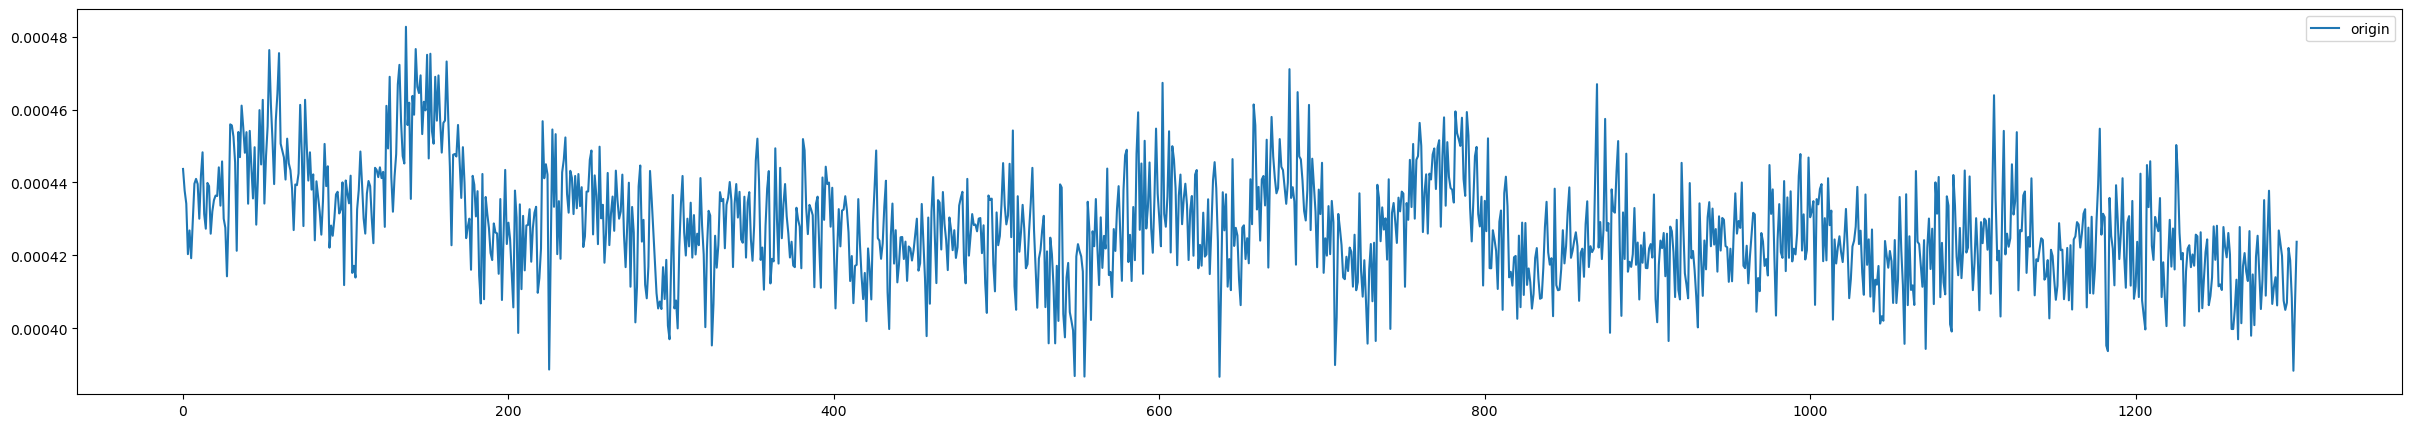

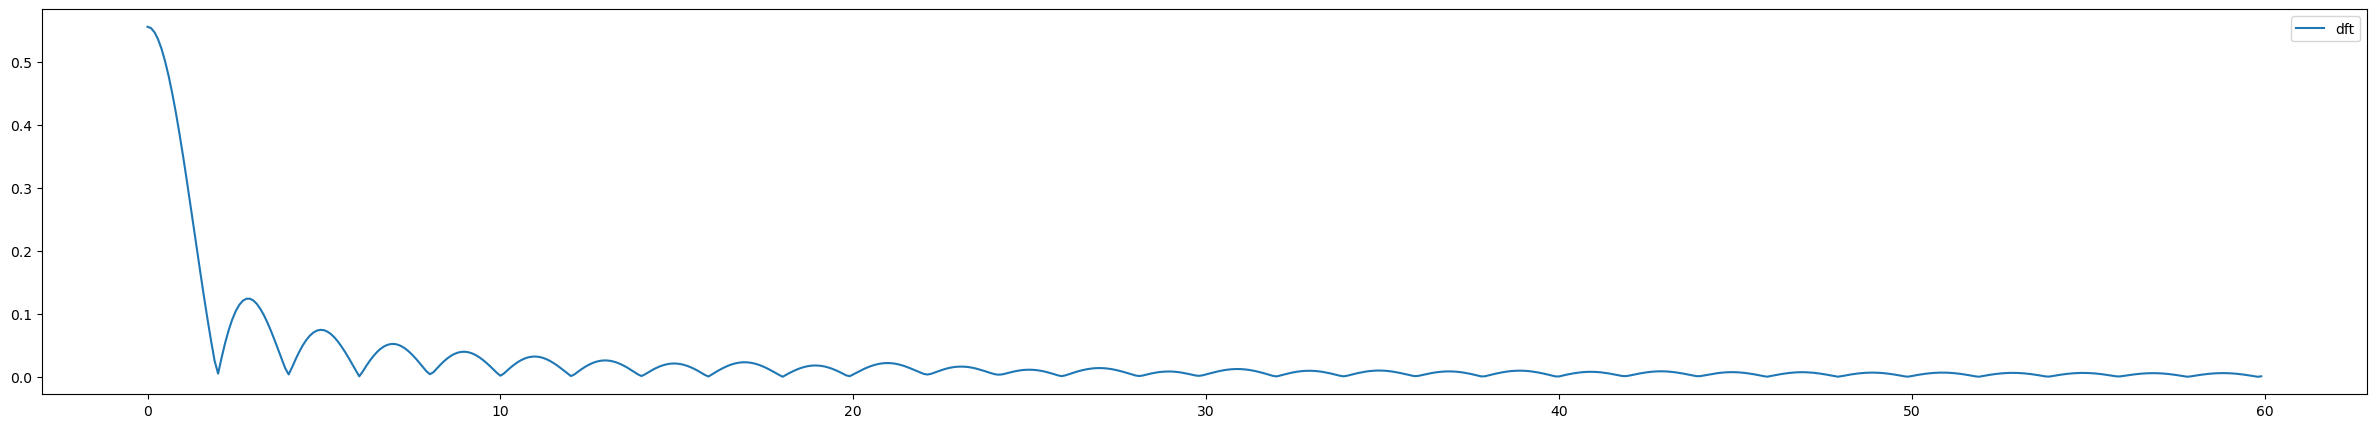

In [13]:
from sklearn.preprocessing import scale
for iSamp in range(38,39):
    Np, Nrx, Ntx, Nsc, Nt, Tdur = Cfg["Np"][iSamp], Cfg["Nrx"], Cfg["Ntx"], Cfg["Nsc"], Cfg["Nt"][iSamp], Cfg["Tdur"][iSamp]
    CSIiSamp = CSI_s[iSamp].reshape(-1, Nt)
    print(CSIiSamp.shape)
    
    fs = Nt / Tdur  # 采样频率
    BPMresol = 0.1
    resol = BPMresol / 60  # 要分辨出0.1BPM，需要的频率分辨率
    Ndft = int(fs / resol)  # DFT点数
    print("Ndft: ", Ndft)

    breathEnd = 1  # 呼吸最高频率 Hz
    dftSize = int(breathEnd / resol)  # DFT宽度

    m, n = np.meshgrid(np.arange(Nt), np.arange(dftSize))
    Wdft = np.exp(-1j * 2 * np.pi * m * n / Ndft)  # dft 矩阵
    print(Wdft.shape)

    realSmooth = savgol_filter(CSIiSamp.real, 8, 7)  # Savitzky-Golay
    imagSmooth = savgol_filter(CSIiSamp.imag, 8, 7)
    CSI_smooth = realSmooth + 1j * imagSmooth
    print(CSI_smooth.shape)

    # 归一化
    # CSI_smooth_std = preprocessing.StandardScaler().fit_transform(np.abs(CSI_smooth))
    CSI_smooth_std = scale(savgol_filter(np.abs(CSIiSamp), 8, 7))
    # CSI_smooth_std = np.zeros_like(CSI_smooth_std)
    # # 赋值为sin函数
    # CSI_smooth_std[0,:] = np.sin(np.arange(0, 6, 6/1300) * 2 * np.pi)

    # CSI_dft = Wdft @ CSIiSamp[0,:]  # DFT
    # CSI_dft = Wdft @ CSI_s[iSamp][0][0][0]
    CSI_dft = np.fft.fft(CSI_s[iSamp][0][0][0], Ndft)[:dftSize]  # DFT
    
    plt.figure(figsize=(30,5))
    # plt.plot(np.abs(CSI_smooth[0,:]), label='smooth')
    # plt.plot(CSI_smooth_std[0,:], label='smooth_std')
    plt.plot(np.abs(CSI_s[iSamp][0][0][0]), label='origin')
    plt.legend()
    plt.show()

    plt.figure(figsize=(30,5))
    plt.plot(np.arange(0, breathEnd, breathEnd / dftSize) * 60, np.abs(CSI_dft), label='dft')
    # plt.plot(np.abs(CSI_dft), label='fft')
    plt.legend()
    plt.savefig('dft.png')
    plt.show()

In [60]:
'''# for iSamp in range(Cfg['Nsamp']):
for iSamp in range(37,38):
    CSI = CSI_s[iSamp]
    Np, Nrx, Ntx, Nsc, Nt, Tdur = Cfg["Np"][iSamp], Cfg["Nrx"], Cfg["Ntx"], Cfg["Nsc"], Cfg["Nt"][iSamp], Cfg["Tdur"][iSamp]

    fs = Nt / Tdur  # 采样频率
    BPMresol = .1
    resol = BPMresol / 60  # 要分辨出0.1BPM，需要的频率分辨率
    Ndft = int(fs / resol)  # DFT点数

    breathEnd = 1  # 呼吸最高频率 Hz
    dftSize = int(breathEnd / resol)  # DFT宽度

    m, n = np.meshgrid(np.arange(Nt), np.arange(dftSize))
    Wdft = np.exp(-1j * 2 * np.pi * m * n / Ndft)  # dft 矩阵

    # 计算每个子载波的RER
    RER_sc_ = [0.0] * Nsc
    RER_ = np.empty((Nsc, Nrx * Ntx))
    for sc in range(Nsc):
        for rx in range(Nrx):
            for tx in range(Ntx):
                CSIf = Wdft @ np.abs(CSI[rx][tx][sc])
                RER_[sc][rx * Ntx + tx] = calcRER(CSIf, breathEnd)
                RER_sc_[sc] += RER_[sc][rx * Ntx + tx]
        RER_sc_[sc] /= Nrx * Ntx
    # 选取RER较大的子载波
    maxRER = np.max(RER_sc_)
    usefulSc = np.where(RER_sc_ >= maxRER * 0.6)[0]
    if len(usefulSc) < Nsc:
        print("%d / %d" % (len(usefulSc), Nsc))

    ret = np.zeros((Np))
    BPMrange = [[10, 30], [6, 40], [5, 50]]
    BPMrangeI = 0
    # # 用取最大的三个峰值求加权平均
    # Amp = [0] * Np
    # WeightedSum = [0] * Np
    rica = RobustICA(n_components=Np, whiten='arbitrary-variance')  # 'arbitrary-variance'

    patterns_ = []
    topCSIidxs_ = np.zeros((Nsc, Np), dtype=int)
    for sc in usefulSc:
        # 选取RER最大的前Np个CSI
        topCSIidx = np.argsort(-RER_[sc])[:Np]
        topCSIidxs_[sc] = topCSIidx
        topCSI = CSI[:, :, sc, :].reshape(Nrx * Ntx, Nt).transpose()[:, topCSIidx]
        # 用独立成分分析提取 Np 个复数呼吸信号
        # S, _ = rica.fit_transform(np.abs(topCSI))
        # S = S.transpose()
        Sreal, _ = rica.fit_transform(topCSI.real)
        Simag, _ = rica.fit_transform(topCSI.imag)
        # S = Sreal.transpose() + 1j * Simag.transpose()
        Sreal, Simag = Sreal.transpose(), Simag.transpose()

        if len(Sreal) < Np or len(Simag) < Np:
            # 如果分解出的独立成分不足Np个，就跳过这个子载波
            usefulSc = np.delete(usefulSc, np.where(usefulSc == sc))
            continue

        for i in range(Np):
            realSmooth = savgol_filter(Sreal[i], 8, 7)  # 用Savitzky-Golay滤波器平滑曲线
            imagSmooth = savgol_filter(Simag[i], 8, 7)
            pattern = np.empty_like(realSmooth)
            patternVar = 0
            for theta in np.linspace(0, 2 * np.pi, 100):
                pattern_ = np.cos(theta) * realSmooth + np.sin(theta) * imagSmooth
                patternVar_ = np.var(pattern_)
                if patternVar_ > patternVar:
                    patternVar = patternVar_
                    pattern = pattern_
            patterns_.append(pattern)

'''

Setting clustering defaults: {'min_samples': 50}
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 196.62it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 210.84it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 308.82it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 276.51it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 492.60it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 487.96it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 490.41it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 478.67it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 473.12it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 492.77it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 493.33it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 496.04it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 492.90it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 492.69it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 205.04it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 217.62it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 240.20it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 283.09it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 205.53it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 169.73it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 215.85it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 191.58it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 263.61it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 345.23it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 304.77it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 290.67it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 356.93it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 362.44it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 188.89it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 196.20it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 298.85it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 303.39it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 179.24it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 210.88it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 202.71it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 269.46it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 454.76it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 449.63it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 484.07it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 479.84it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 483.24it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 487.43it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 489.23it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 479.55it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 354.24it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 347.63it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 268.18it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 215.93it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 201.61it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 469.25it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 481.91it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 404.76it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 296.90it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 482.20it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 227.83it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 234.66it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 350.74it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 346.77it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 174.47it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...
Running FastICA multiple times...


100%|██████████| 100/100 [00:00<00:00, 192.40it/s]
/shared/conda/envs/bolt/lib/python3.10/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Inferring sign of components...
Reducing dimensions...
Clustering...
Computing centroids...


In [ ]:
'''获得时域数据集'''
'''# 记录Np=1、Nt<1600的CSI样本有多少个
CSI_Np1_Nt1600_cnt = 0
for ii in range(Cfg['Nsamp']):
    # CSI_s.append(CsiFormatConvrt(CSI[Nt[ii]:Nt[ii+1],:], Cfg['Nrx'],
    #                                     Cfg['Ntx'], Cfg['Nsc'], Cfg['Nt'][ii]))
    if Cfg['Np'][ii] == 1 and Cfg['Nt'][ii] < 1600:
        CSI_Np1_Nt1600_cnt += 1


# 生成训练数据集
CSI_train = np.zeros((CSI_Np1_Nt1600_cnt*CSI.shape[1], 1500), dtype = complex) # CSI序列
GT_train = np.zeros((CSI_Np1_Nt1600_cnt*CSI.shape[1], 1), dtype = float) # 呼吸速率真实值
CSI_Np1_Nt1600_cnt = 0
for ii in range(Cfg['Nsamp']):
    if Cfg['Np'][ii] == 1 and Cfg['Nt'][ii] < 1600:
        CSI_Np1_Nt1600_cnt += 1
        CSI_Nsamp = np.transpose(CSI[Nt[ii]:Nt[ii+1],:]) #90,1500
        CSI_train[(CSI_Np1_Nt1600_cnt-1)*CSI.shape[1]:CSI_Np1_Nt1600_cnt*CSI.shape[1],:] = CSI_Nsamp[:,0:1500]
        GT_train[(CSI_Np1_Nt1600_cnt-1)*CSI.shape[1]:CSI_Np1_Nt1600_cnt*CSI.shape[1],0] = gt[ii]

# CSI序列实虚部分开,savgol_filter滤波，归一化,最后把实虚部分作为第三个维度合并
CSI_train_real = savgol_filter(np.real(CSI_train), 8, 7, axis=1)
CSI_train_imag = savgol_filter(np.imag(CSI_train), 8, 7, axis=1)
CSI_train_real = preprocessing.StandardScaler().fit_transform(CSI_train_real)
CSI_train_imag = preprocessing.StandardScaler().fit_transform(CSI_train_imag)
CSI_train_conca = np.concatenate((CSI_train_real[:,:,np.newaxis], CSI_train_imag[:,:,np.newaxis]), axis=2)

# for i in range(CSI_train_conca.shape[0]):
#     print(np.min(CSI_train_conca[i,:]), np.max(CSI_train_conca[i,:]))
print(CSI_train_conca.shape)
print(GT_train.shape)

# 保存前4500个样本作为训练集
CSI_train_conca = CSI_train_conca[0:4500,:]
GT_train = GT_train[0:4500,:]
print(CSI_train_conca.shape)
np.save(PathTrain + '/CSI_train_conca.npy', CSI_train_conca)
np.save(PathTrain + '/GT_train.npy', GT_train)
'''